In [1]:
import tweepy
import numpy as np
import csv
import os
from os import path
from tweepy import OAuthHandler
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import random
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import botometer


# Consumer keys and access tokens, used for OAuth
consumer_key = 'XXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXX'
access_token_secret = 'XXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Open/Create a file to append data
csvFile = open('muslim_hashtag.csv', 'w', encoding='utf-8')
#Use csv Writer
 
HEADER = ["screen_name","location", "language", "text", "created_at", "retweet_count", "likes_count"]
csvWriter = csv.writer(csvFile)
csvWriter.writerow(HEADER)

#request the keyword as an input
a=input("Enter your keyword to start the search: ")
count=input("Enter number of tweets to start the search: ")
#search for a hashtag/keyword and write to the CSV file
for tweet in tweepy.Cursor(api.search,q=str.lower(a),
                           since="2020-03-01", wait_on_rate_limit=True,).items(int(count)):
    #print (tweet.user.screen_name, tweet.user.location, tweet.lang, tweet.text, tweet.created_at, tweet.retweet_count, tweet.favorite_count)
    csvWriter.writerow([tweet.user.screen_name, tweet.user.location, tweet.lang, tweet.text, tweet.created_at, tweet.retweet_count, tweet.favorite_count])




Enter your keyword to start the search: iran
Enter number of tweets to start the search: 1000


### Make a bar plot from the most frequent languages of the tweets

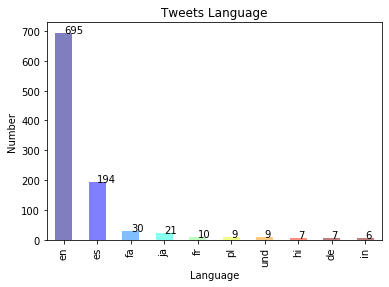

In [2]:
#Create a scatter chart with languages
df=pd.read_csv("muslim_hashtag.csv", encoding='utf-8')
freq=df["language"].value_counts()[df["language"].value_counts()>3]

# Get a color map
my_cmap = cm.get_cmap('jet')
# Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
my_norm = Normalize(vmin=0, vmax=8)
#make a bar plot
color=[i for i in range(0, 10)]
freq.plot.bar(color=my_cmap(my_norm(color)), alpha=0.5)
#add the value of each one
for index, value in enumerate(freq):
	plt.text(index, value,  str(value))
plt.ylabel("Number")
plt.xlabel("Language")
plt.title("Tweets Language")
plt.savefig('tweets_lang.pdf', dpi=100)
plt.show()

### Show the frequency of location and save it 

In [3]:
#Create a bar chart with languages
df=pd.read_csv("muslim_hashtag.csv")
freq=df["location"].value_counts()
freq.dropna()
common_freq=df["location"].value_counts()[df["location"].value_counts()>3]
print(common_freq)
#save as a csv and excel file
freq.to_csv('tweets_location.csv', encoding='utf-8', header=True)

United States            18
USA                      17
stockholm                16
human rights activist    14
Texas, USA               12
横須賀→駒場→本郷                10
Maracay                   8
Earth                     8
Malmö Sweden              8
San Diego, CA             7
Illinois USA              6
Venezuela                 6
Caracas, Venezuela        6
India                     6
Florida, USA              6
Australia                 5
California, USA           4
Los Angeles, CA           4
Maracaibo                 4
Name: location, dtype: int64


### Extract hashtags from English tweets

In [4]:
df=pd.read_csv("muslim_hashtag.csv")
df_text=df[["text"]]
# for only english text column use: df_text=df[df.language=="en"][["text"]]
df_text["text"]=df_text["text"].str.lower().str.replace("https:.*","")
hashtag=[]
for line in df_text["text"]:
    x=re.findall(r"#(\w+)", line, re.UNICODE)
    if x!=[]:
        for item in x:
            hashtag.append(item)
df_hashtag = pd.DataFrame(hashtag, columns =['Hashtag']) 
df_hashtag=df_hashtag["Hashtag"].value_counts()[df_hashtag["Hashtag"].value_counts()>3]
#save as a csv and excel file
csv=df_hashtag.to_csv("tweet_hashtag.csv", encoding='utf-8', header=True)
print(df_hashtag)

iran                   107
coronavirus             27
irán                    23
eeuu                    14
22abril                 13
covid19                 13
venezuela               12
satélite                10
godmorningthursday       8
freeiran2020             6
notimippci               6
uniónydignidad           5
china                    4
22abr                    4
breaking                 4
nour1                    4
trump                    4
coronavirusoutbreak      4
navy                     4
Name: Hashtag, dtype: int64


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Create a Wordcloud from the frequency of the hashtags

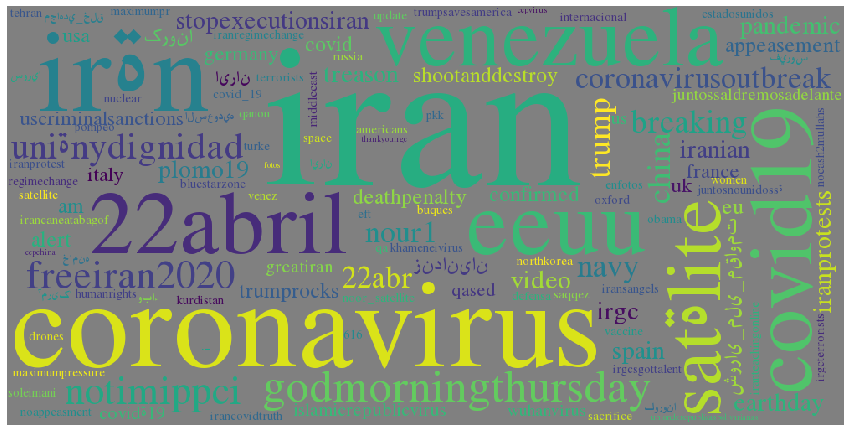

In [5]:
stopwords = set(STOPWORDS)
font_path = '/Users/royapakzad/Applications/OneDrive/Code/Twitter_Hashtag/FreePersianFont/FreeFarsi.ttf'
word_could_dict=Counter(hashtag)
wordcloud = WordCloud(font_path=font_path, width = 1000, height = 500, background_color='grey', max_words=2000, stopwords=stopwords, contour_width=3, contour_color='black').generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('tweets_wordcloud.pdf', dpi=100)
plt.show()


### Create a bar chart with most frequent users who tweeted

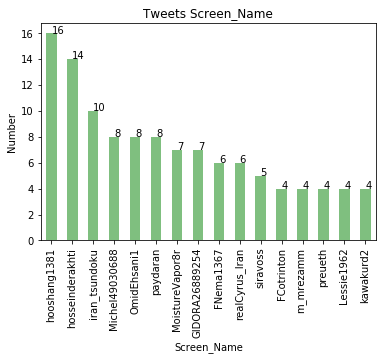

In [6]:
users=df["screen_name"]
users=df["screen_name"].value_counts()[df["screen_name"].value_counts()>3] #users who tweeted 3 or more times
#save as a csv and excel file
csv=users.to_csv("tweet_users.csv", encoding='utf-8', header=True)
my_cmap = cm.get_cmap('jet')
# Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
my_norm = Normalize(vmin=0, vmax=8)
#make a bar plot
users.plot.bar(color="green", alpha=0.5)
for index, value in enumerate(users):
	plt.text(index, value,  str(value))
plt.ylabel("Number")
plt.xlabel("Screen_Name")
plt.title("Tweets Screen_Name")
plt.savefig('tweets_screen_name.pdf', dpi=100)
plt.show()

### Check those users with botometer

In [7]:
import botometer
import json
# you need botometer authentication key from https://botometer.iuni.iu.edu/#!/api
mashape_key ='XXXXXXXXXXXX'
data=[]
bom=botometer.Botometer(wait_on_ratelimit=True, mashape_key=mashape_key, consumer_key=consumer_key, consumer_secret=consumer_secret )
users_bot=list((df["screen_name"].value_counts()[df["screen_name"].value_counts()>11]).index) #users who tweeted 11 or more times
users_bot
for screen_name, result in bom.check_accounts_in(users_bot):
	data.append(result)
	with open("users_bot_score.json", "w") as write_file:
		json.dump(data, write_file, indent=4)


In [8]:
#save as CSV file
from pandas import json_normalize
temp=pd.read_json(r'users_bot_score.json')
temp1=json_normalize(temp['user'])
temp3=json_normalize(temp['cap'])
temp5=json_normalize(temp['display_scores'])
temp1['display_scores_en']=temp5['english']
temp1['display_scores_universal']=temp5['universal']
temp1['display_scores_universal']=temp5['universal']
temp1['display_scores_friend']=temp5['friend']
temp1['display_scores_network']=temp5['network']
temp1['display_scores_temporal']=temp5['temporal']
temp1['display_scores_user']=temp5['user']
temp1['display_scores_content']=temp5['content']
temp1['display_scores_sentiment']=temp5['sentiment']
temp1['automation_probability_en %']=temp3['english']*100
temp1['automation_probability_universal %']=temp3['universal']*100
csv=temp1.to_csv('users_bot_score.csv', header=True)


### Save all these analysis in an excel file

In [9]:
#users=df["screen_name"].most_common(15)
#print(users)
with pd.ExcelWriter('tweet_analysis.xlsx') as writer:  
    freq.to_excel(writer, sheet_name='location', header=True)
    df_hashtag.to_excel(writer, sheet_name='hashtag', header=True)
    users.to_excel(writer, sheet_name='screen_name', header=True)
    temp1.to_excel(writer, sheet_name='bot_score_screen_name', header=True )